# 이상치
---
- 변수 범위에서 많이 벗어난 아주 작은 값이나 큰값
- 이상치는 일반화된 모델을 생성하는데 악영향을 끼친다.
- 따라서 이상치를 포함하는 레코드는 제거하는 것이 바람직하다.
- 이상치는 결측치 처럼 추정하는 대상이 아니다. (무조건 삭제)


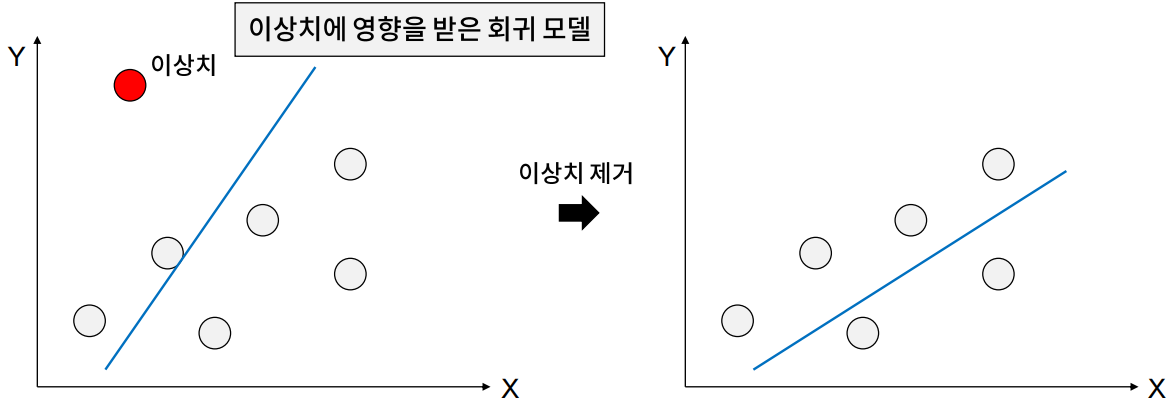

---
**이상치 제거가 반드시 필요한 모델들 = class의 평균을 쓰는 모델들**
- Tree 기반 모델
- 거리를 쓰는 모델 
- KNN
- 회귀모델 (미분과정에서 평균개념이 들어감)

Tip. 전처리 과정에서 중점을 두어야 하는 포인트는 `새로 들어온 데이터가 어떨것인가` 이다.

- 새로들어오는 데이터가 좌측의 그림처럼 이상치가 있는 경우라면 어쩔 수 없지만, 전처리르 할때는 기존 train data에 이상치를 제외한 나머지는 우측 그림과 같은 평균을 가지고 있으니, `새로들어오는 데이터도 이상치를 제거한 우측 그림과 같은 경향을 띌 것이다` 라는 가정하에 처리하고, 해당 데이터 분포에 맞는 모델을 만드는 것

# 이상치 판단 방법 (1) - IQR Rule
---
- 변수별로 IQR 규칙을 만족하지 않는 sample들을 판단하여 삭제하는 방법이다.
- IQR은 Q3(3사분위수) - Q1(1사분위수) 한 값을 의미
- IQR Rule은 1) [Q3+IQR * 1.5]한 값보다 크거나 2)[Q1 - IQR * 1.5] 한 값보다 작은 경우에 이상치로 판단하는 방법
---
**FYI**
- IQR Rule과 비슷한 방식으로는 z-score를 구해서(표준화), [Q3+IQR * 1.5]한 값보다 크거나 2)[Q1 - IQR * 1.5] 한 값보다 작은 경우에 속할 확률을 구해서 특정 확률 미만이면 이상치로 판단
---
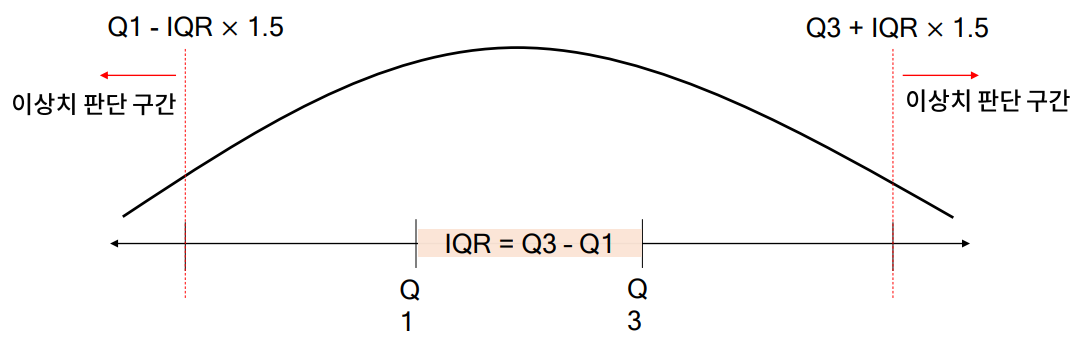

---
**장점**
- IQR Rule 이나 z-score 판별법 모두 `직관적이고 사용이 간편`하다.

**단점**
- IQR Rule 이나 z-score 판별법으로 이상치를 판단하기 어려운 경우가 있을 수 있다.
- 이 경우 완벽하에 이상치를 제거하지 못할 수 있다.
    - 1) 단일 변수로 보면 이상치 인데 여러 변수와 같이 판별하면 이상치가 아닌 경우
    - 2) 단일 변수로 보면 이상치가 아닌데, 여러변수와 같이 판별하면 이상치인 경우
- IQR Rule로 판별하면 과도하게 이상치가 많이 나오는 경우가 있다.
    - Box plot에 표시되는 이상치가 IQR Rule로 판단한 결과인데, boxplot자체가 생성이 안되고 이상치만 표현되는 경우

**즉, IQR Rule은 절대적으로 이상치를 판별하는 완벽한 기준이 되기는 어렵다.**

---
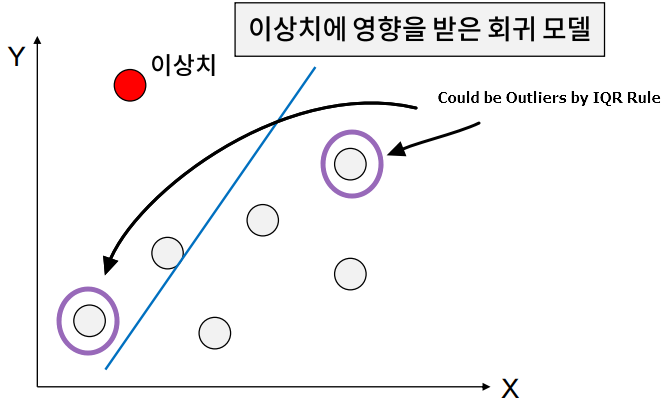

---
- 위에서 이상치로 예시를 들었던 그림을 다시 보면 이상치가 Y값으로는 큰편이지만, X값에서는 작은 편이다.
- 즉 X로만 보면 문제가 되는 데이터가 아니지만, X와 Y의 관계로 볼때 문제가 되는 데이터(=이상치)이다. 
- 이런 경우 IQR Rule로 판별하면, 위의 그림과 같이 X 값에서 과도하게 작거나 큰 위치의 값들이 이상치로 판별될 수 도 있다.

## 관련 문법 : numpy.quantile
---
- Array의 q번째 quantile(변위치)를 구하는 함수



**파라미터**

---
- a : input array (list, ndarray, array 등)
- q : quantile ( 0 과 1 사이의 임의의 값)

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

실습 데이터 로드

In [2]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass_type
0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
1,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
2,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
3,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
4,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.11,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Fe          214 non-null    float64
 8   Glass_type  214 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 15.2 KB


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,0.510000,7.000000


In [5]:
# 특징과 라벨 분리
X = df.drop(['Glass_type'], axis = 1)
Y = df['Glass_type']

In [6]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape

(160, 8)

# IQR Rule 함수

In [7]:
import numpy as np
def IQR_rule(val_list): # 한 특징에 포함된 값 (즉, column과 대응되는 Series)
    # IQR 계산    
    Q1 = np.quantile(val_list, 0.25) # 25%값
    Q3 = np.quantile(val_list, 0.75) # 75%값
    IQR = Q3 - Q1
    
    # IQR rule을 위배하지 않는 bool list 계산 (True: 이상치 X, False: 이상치 O)
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    return not_outlier_condition

## 결과 확인 방식 (1) DataFrame형식으로 시각화

In [8]:
# DataFrame에 apply함수가 적용되면 '열' 단위로 적용된다.
conditions = Train_X.apply(IQR_rule) # apply를 이용하여 모든 컬럼에 IQR rule 함수 적용
conditions

,RI,Na,Mg,Al,Si,K,Ca,Fe
129,True,True,True,True,True,True,True,True
167,True,True,True,True,True,True,True,True
57,True,True,True,True,True,True,True,True
147,True,True,True,True,True,True,True,True
187,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...
210,True,True,True,False,True,True,True,True
156,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True
102,True,True,True,False,True,True,True,True


## 결과 확인 방식 (2) 컬럼별 개수 확인

In [9]:
num_outliers = len(Train_X) - Train_X[Train_X.columns].apply(IQR_rule).sum(axis = 0) 
print(num_outliers)

RI    10
Na     5
Mg     0
Al    19
Si     9
K      6
Ca    17
Fe     8
dtype: int64


# IQR Rule 적용 (이상치 제거)

- conditions에서 행단위로 볼때 하나라도 False가 있으면 이상치 이므로 제거해줘야 한다.
- 컬럼수가 8이므로, 행 기준으로 T/F를 sum했을때 8이 아닌 것은 제거 (연산함수에서 True는 1을 활용)

In [10]:
# 하나라도 IQR 규칙을 위반하는 요소를 갖는 레코드를 제거하기 위한 규칙
total_condition = conditions.sum(axis = 1) == len(Train_X.columns) 
Train_X = Train_X.loc[total_condition] # 이상치 제거 (규칙 적용)

In [11]:
Train_X.shape #  50개의 값이 삭제되었다.

(118, 8)

# 이상치 제거 결과 판단 및 조정
---
제거된 이상치의 비율을 보면 아래와 같다.

In [12]:
print('삭제된 이상치의 비율은', 50/160, '입니다.')

삭제된 이상치의 비율은 0.3125 입니다.


- 전체 데이터가 160개인데 그중 30%가 이상치라는 것은 너무 많은 개수이다.
- 따라서 삭제된 50개가 모두 이상치라고 보는 것은 적합하지 못하다.
- 이 경우 IQR Rule의 함수를 조정해준다.
- **일반적으로 이상치는 전체 데이터의 1% 정도이다.**

```python
import numpy as np
def IQR_rule(val_list): # 한 특징에 포함된 값 (즉, column과 대응되는 Series)
    # IQR 계산    
    Q1 = np.quantile(val_list, 0.25) # 25%값
    Q3 = np.quantile(val_list, 0.75) # 75%값
    IQR = Q3 - Q1
    
    # IQR rule을 위배하지 않는 bool list 계산 (True: 이상치 X, False: 이상치 O)
    # 제외된 이상치 비율이 너무 과도할 경우 condition을 조정해줄 필요가 있다.
    # 1.5 라는 값은 절대값이 아니다. (해당 값이 클수록 이상치로 판단되는 수가 줄어든다.)
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)  
    return not_outlier_condition
```